## Project 2 - Modeling Using OLS, Ridge and Lasso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime 
import pickle
import seaborn as sns

%matplotlib inline

#### Open the cleaned Polk County Liquor dataframe 

In [38]:
with open('chal2_polk_clean_OLS.pickle','rb') as read_file:
    polk_clean = pickle.load(read_file)

In [39]:
polk_clean.head()

,Store_Number,Pack,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Qtr_Sales,Volume_Sold_(Gallons),Retail_Margin,Gross_Margin,...,SNOW,SNWD,TMAX,TMIN,TOBS,FLUC,DIFF,Holiday,Daylight_mins,EoY_Sales
0,2190,765.209302,53916.279070,734.510465,1103.437209,17171,217983.12,3154.50,10.485530,2549.400111,...,15.5,82.0,31.209302,8.255814,17.581395,22.953488,1.441860,4,645.116279,1323649.20
1,2238,66.000000,6250.000000,65.750000,98.623333,160,2653.34,44.64,3.000587,442.203500,...,0.0,3.0,39.333333,13.666667,21.000000,25.666667,2.000000,0,662.666667,87382.38
2,2248,881.857143,59194.642857,966.581429,1452.374286,6820,126742.58,1431.46,13.162952,4554.053113,...,6.7,28.0,34.142857,11.071429,18.357143,23.071429,5.000000,3,640.714286,631166.08
3,2478,215.000000,17125.000000,252.744167,379.222500,2392,40966.77,605.93,7.181334,1708.958939,...,1.4,20.0,30.666667,8.000000,21.166667,22.666667,-0.833333,0,645.333333,181014.76
4,2502,1146.142857,106958.928571,1195.480714,1796.393571,14545,194797.55,3992.86,15.724111,7021.538460,...,3.6,26.0,30.500000,8.214286,20.500000,22.285714,0.285714,1,647.071429,1267320.27


In [4]:
polk_clean.columns

Index(['Store_Number', 'Pack', 'Bottle_Volume_(ml)', 'State_Bottle_Cost',
       'State_Bottle_Retail', 'Bottles_Sold', 'Qtr_Sales',
       'Volume_Sold_(Gallons)', 'Retail_Margin', 'Gross_Margin', 'BRANDIES',
       'COCKTAILS', 'COFFEE_LIQUEURS', 'GINS', 'LIQUEURS', 'OTHERS', 'RUM',
       'SCHNAPPS', 'SCOTCH', 'TEQUILA', 'VODKA', 'WHISKIES', 'PRCP', 'SNOW',
       'SNWD', 'TMAX', 'TMIN', 'TOBS', 'FLUC', 'DIFF', 'Holiday',
       'Daylight_mins', 'EoY_Sales'],
      dtype='object')

## Pre-Modeling - Baseline OLS predict year end sales base without weather

In [5]:
polk_OLS = polk_clean.drop(['Store_Number', 'PRCP', 'SNOW',
       'SNWD', 'TMAX', 'TMIN', 'TOBS', 'FLUC', 'DIFF', 'Holiday',
       'Daylight_mins'], axis=1, errors="ignore")

In [6]:
polk_OLS.head()

,Pack,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Qtr_Sales,Volume_Sold_(Gallons),Retail_Margin,Gross_Margin,BRANDIES,...,GINS,LIQUEURS,OTHERS,RUM,SCHNAPPS,SCOTCH,TEQUILA,VODKA,WHISKIES,EoY_Sales
0,765.209302,53916.279070,734.510465,1103.437209,17171,217983.12,3154.50,10.485530,2549.400111,393.90,...,240.96,68.22,154.90,226.08,44.85,71.88,110.70,977.96,742.35,1323649.20
1,66.000000,6250.000000,65.750000,98.623333,160,2653.34,44.64,3.000587,442.203500,0.00,...,0.00,1.38,0.00,15.85,1.65,0.00,0.00,7.14,9.51,87382.38
2,881.857143,59194.642857,966.581429,1452.374286,6820,126742.58,1431.46,13.162952,4554.053113,67.50,...,100.95,69.63,109.63,74.06,13.24,86.15,20.63,451.07,405.20,631166.08
3,215.000000,17125.000000,252.744167,379.222500,2392,40966.77,605.93,7.181334,1708.958939,7.14,...,34.09,8.73,29.94,123.24,15.26,3.57,33.69,174.64,154.43,181014.76
4,1146.142857,106958.928571,1195.480714,1796.393571,14545,194797.55,3992.86,15.724111,7021.538460,78.09,...,202.96,58.39,253.75,567.14,80.76,21.46,85.13,1308.16,1028.50,1267320.27


In [7]:
polk_OLS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4070 entries, 0 to 4069
Data columns (total 22 columns):
Pack                     4070 non-null float64
Bottle_Volume_(ml)       4070 non-null float64
State_Bottle_Cost        4070 non-null float64
State_Bottle_Retail      4070 non-null float64
Bottles_Sold             4070 non-null int64
Qtr_Sales                4070 non-null float64
Volume_Sold_(Gallons)    4070 non-null float64
Retail_Margin            4070 non-null float64
Gross_Margin             4070 non-null float64
BRANDIES                 4070 non-null float64
COCKTAILS                4070 non-null float64
COFFEE_LIQUEURS          4070 non-null float64
GINS                     4070 non-null float64
LIQUEURS                 4070 non-null float64
OTHERS                   4070 non-null float64
RUM                      4070 non-null float64
SCHNAPPS                 4070 non-null float64
SCOTCH                   4070 non-null float64
TEQUILA                  4070 non-null float64
VO

## Train/Test Split - Feature Engineering

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

#### Setting up a baseline model 

In [19]:
X, y = polk_OLS.drop('EoY_Sales',axis=1), polk_OLS['EoY_Sales']
# hold out 20% of the data for final testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=10)

#### First run pure OLS with no regularization

In [20]:
# fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
#score fit model on validation data
val_score = lr_model.score(X_val, y_val)
    
# report results
print('\nValidation R^2 score was:', val_score)
print('Feature coefficient results: \n')
for feature, coef in zip(X.columns, lr_model.coef_):
    print(feature, ':', f'{coef:.2f}') 


Validation R^2 score was: 0.9691974315060713
Feature coefficient results: 

Bottle_Volume : -0.82
State_Bottle_Cost : 53371.81
State_Bottle_Retail : -35396.66
Bottles_Sold : 2.46
Qtr_Sales : 1.05
Volume_Sold : 198.41
Retail_Margin : -4978.14
Gross_Margin : -10.68
BRANDIES : -119.46
COCKTAILS : -80.01
COFFEE_LIQUEURS : -722.91
GINS : 1943.00
LIQUEURS : 1333.70
OTHERS : -187.76
RUM : 122.46
SCHNAPPS : -273.34
SCOTCH : -1258.07
TEQUILA : -263.97
VODKA : -174.89
WHISKIES : -120.32
Pack : -16.85


#### Base Model is pretty decent with R^2 of 97%, look at p-values using statsmodel

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

### Flip columns for statsmodel syntax

In [23]:
cols = list(polk_OLS.columns)
a, b = cols.index('Pack'), cols.index('EoY_Sales')
cols[b], cols[a] = cols[a], cols[b]
polk_OLS = polk_OLS[cols]

In [24]:
polk_OLS.head()

,Pack,Bottle_Volume,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Qtr_Sales,Volume_Sold,Retail_Margin,Gross_Margin,BRANDIES,...,GINS,LIQUEURS,OTHERS,RUM,SCHNAPPS,SCOTCH,TEQUILA,VODKA,WHISKIES,EoY_Sales
0,765.209302,53916.279070,734.510465,1103.437209,17171,217983.12,3154.50,10.485530,2549.400111,393.90,...,240.96,68.22,154.90,226.08,44.85,71.88,110.70,977.96,742.35,1323649.20
1,66.000000,6250.000000,65.750000,98.623333,160,2653.34,44.64,3.000587,442.203500,0.00,...,0.00,1.38,0.00,15.85,1.65,0.00,0.00,7.14,9.51,87382.38
2,881.857143,59194.642857,966.581429,1452.374286,6820,126742.58,1431.46,13.162952,4554.053113,67.50,...,100.95,69.63,109.63,74.06,13.24,86.15,20.63,451.07,405.20,631166.08
3,215.000000,17125.000000,252.744167,379.222500,2392,40966.77,605.93,7.181334,1708.958939,7.14,...,34.09,8.73,29.94,123.24,15.26,3.57,33.69,174.64,154.43,181014.76
4,1146.142857,106958.928571,1195.480714,1796.393571,14545,194797.55,3992.86,15.724111,7021.538460,78.09,...,202.96,58.39,253.75,567.14,80.76,21.46,85.13,1308.16,1028.50,1267320.27


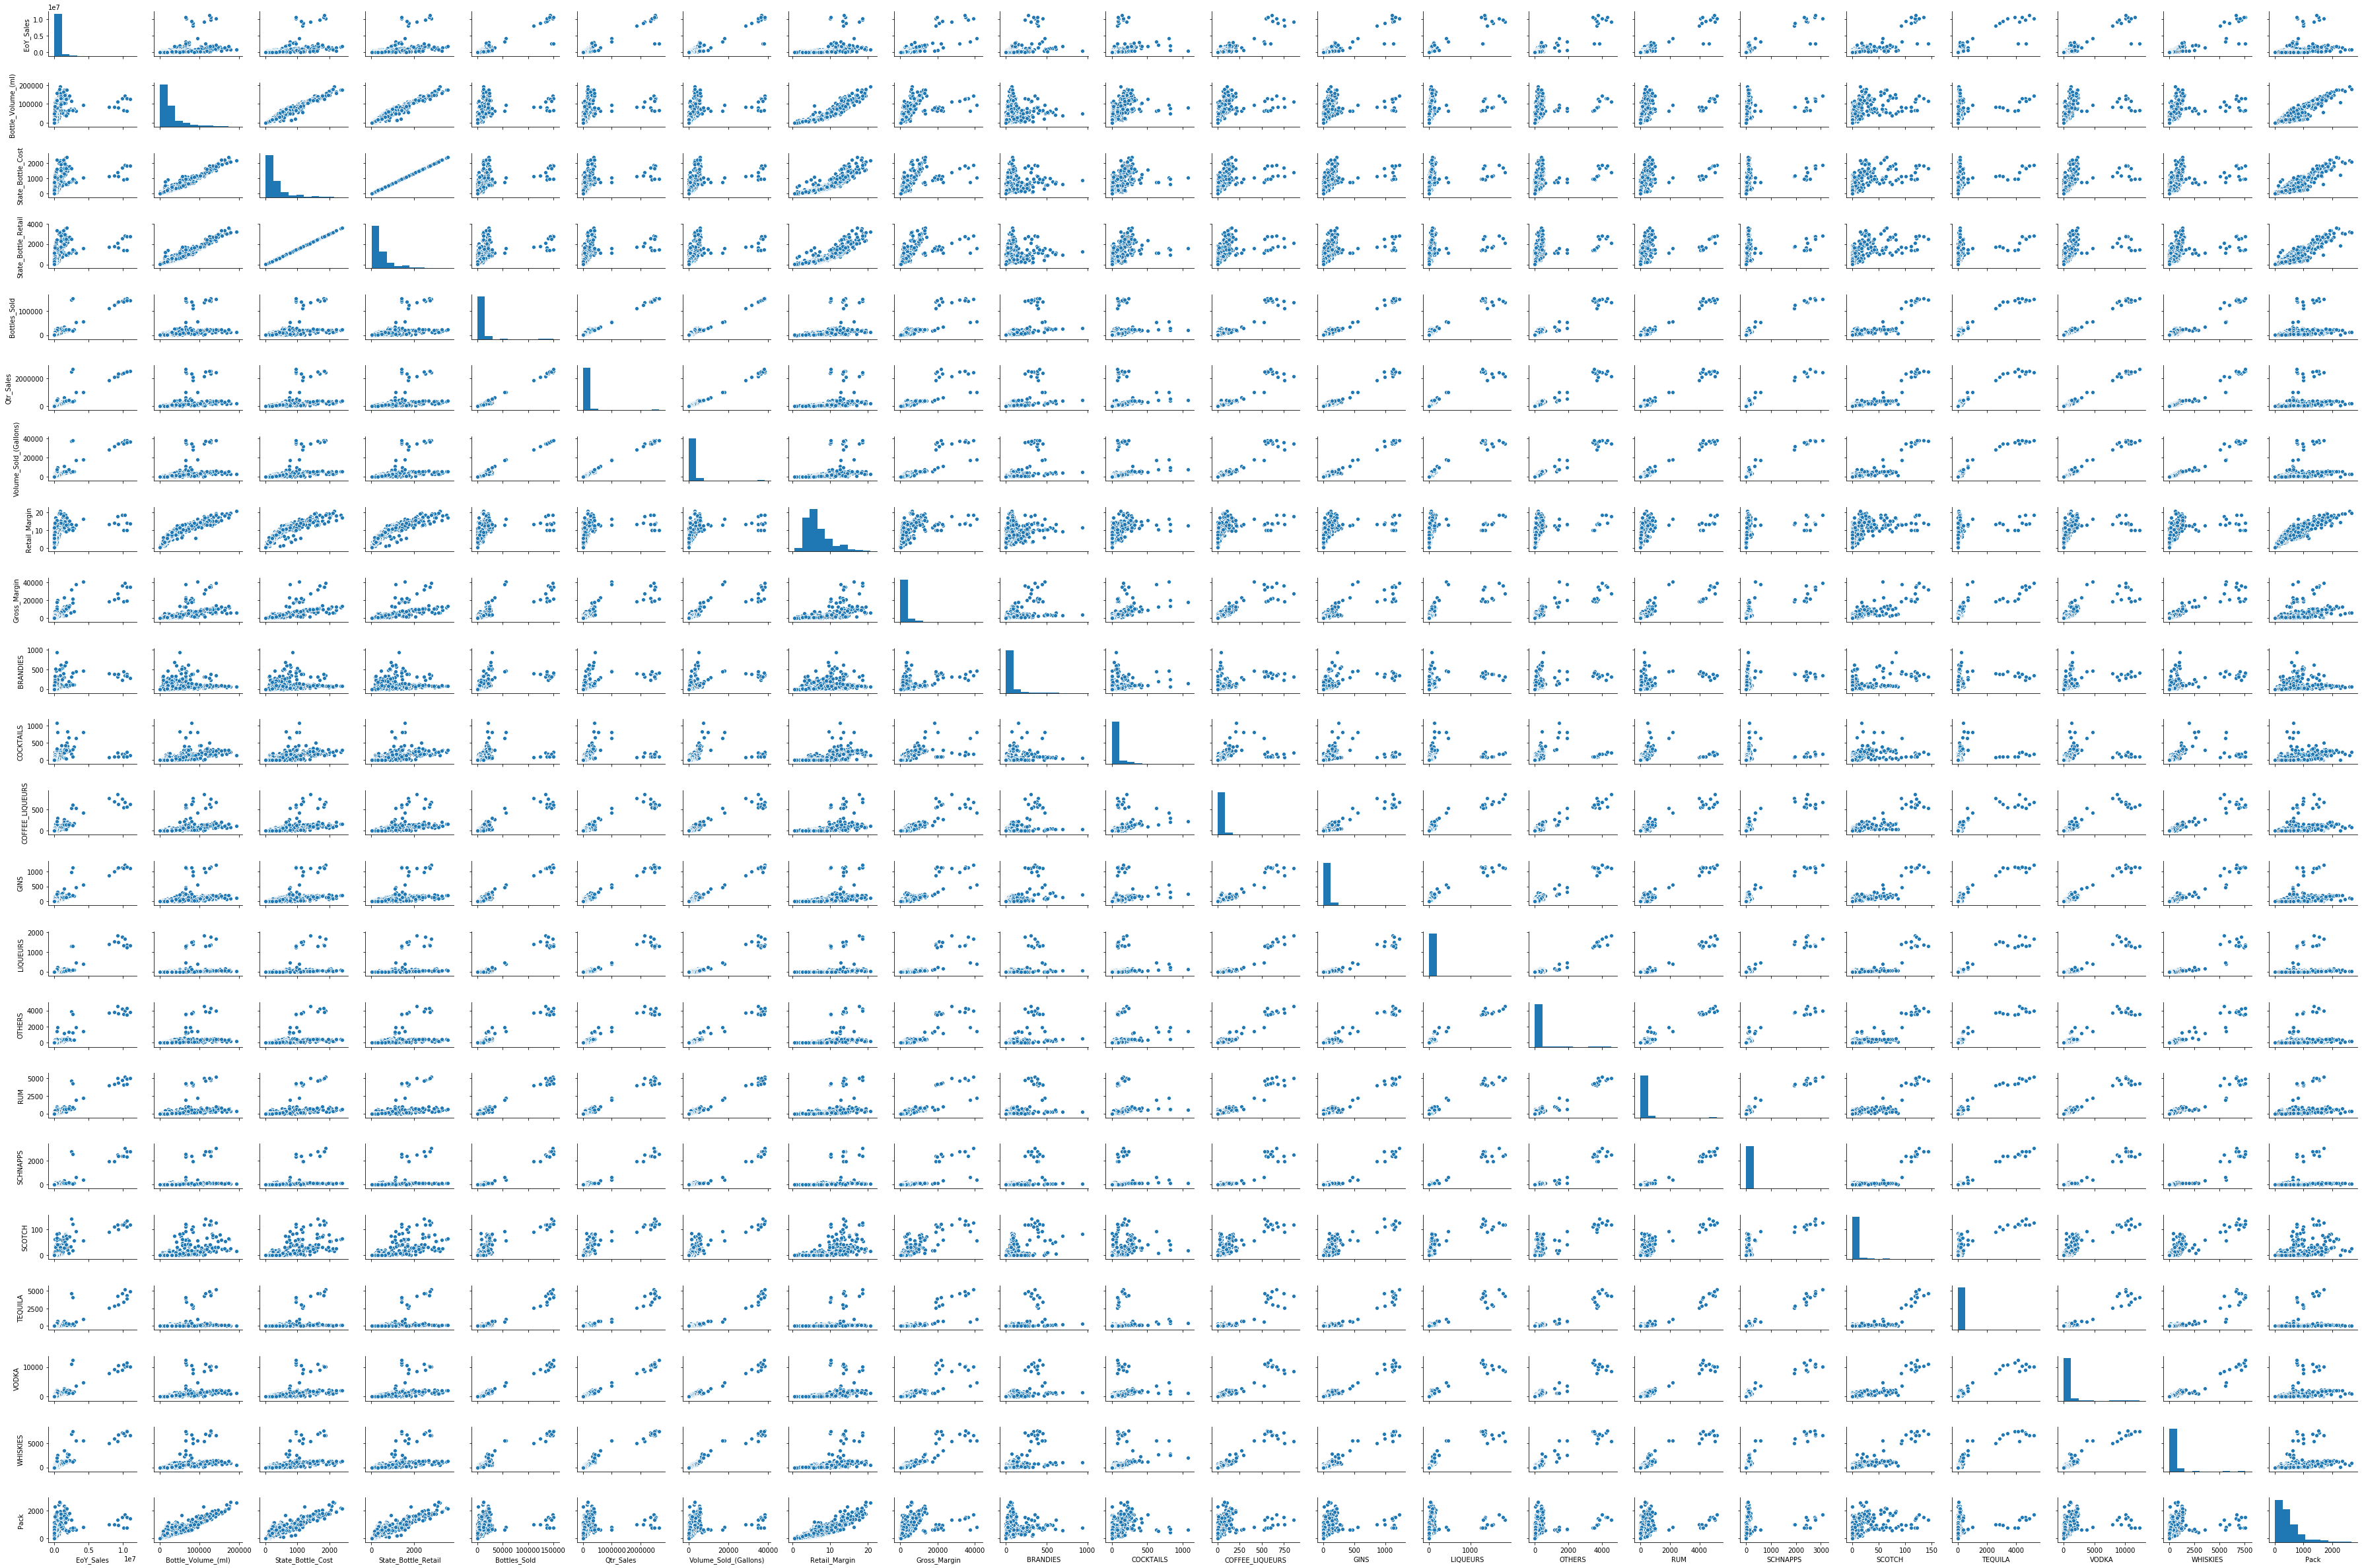

In [15]:
sns.pairplot(polk_OLS, height=1.5, aspect=1.5);

In [25]:
polk_OLS = polk_OLS.rename(columns={'Bottle_Volume_(ml)': 'Bottle_Volume'})
polk_OLS = polk_OLS.rename(columns={'Volume_Sold_(Gallons)': 'Volume_Sold'})

In [26]:
' +'.join(polk_OLS.columns)

'Pack +Bottle_Volume +State_Bottle_Cost +State_Bottle_Retail +Bottles_Sold +Qtr_Sales +Volume_Sold +Retail_Margin +Gross_Margin +BRANDIES +COCKTAILS +COFFEE_LIQUEURS +GINS +LIQUEURS +OTHERS +RUM +SCHNAPPS +SCOTCH +TEQUILA +VODKA +WHISKIES +EoY_Sales'

In [28]:
lm1 = smf.ols('EoY_Sales ~ +Bottle_Volume +State_Bottle_Cost +State_Bottle_Retail +Bottles_Sold +Qtr_Sales +Volume_Sold +Retail_Margin +Gross_Margin +BRANDIES +COCKTAILS +COFFEE_LIQUEURS +GINS +LIQUEURS +OTHERS +RUM +SCHNAPPS +SCOTCH +TEQUILA +VODKA +WHISKIES +Pack', data=polk_OLS)

#Fit the model
fit1 = lm1.fit()

#Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              EoY_Sales   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     4955.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:07:12   Log-Likelihood:                -55521.
No. Observations:                4070   AIC:                         1.111e+05
Df Residuals:                    4049   BIC:                         1.112e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.779e+04   1.09e+04      1.626      0.104   -3659.733    3.92e+04
Bottle_Volume           0.2595      0.659      0.394      0.694      -1.033       1.552
State_Bottle_Cost    4.679e+04   8886.042      5.265      0.000    2.94e+04    6.42e+04
State_Bottle_Retail -3.105e+04   5925.793     -5.241      0.000   -4.27e+04   -1.94e+04
Bottles_Sold           -0.3334      2.716     -0.123      0.902      -5.659       4.992
Qtr_Sales               1.9172      0.291      6.583      0.000       1.346       2.488
Volume_Sold           117.5743     45.046      2.610      0.009      29.259     205.890
Retail_Margin       -4801.8511   2860.906     -1.678      0.093   -1.04e+04     807.099
Gross_Margin          -15.4404      3.207     -4.814      0.000     -21.729      -9.152
BRANDIES              -69.1584     71.208     -0.971      0.331    -208.765      70.448
COCKTAILS             -78.4780     57.015     -1.376      0.169    -190.260      33.304
COFFEE_LIQUEURS      -776.5948    143.587     -5.409      0.000   -1058.105    -495.085
GINS                 1951.1337    166.694     11.705      0.000    1624.321    2277.946
LIQUEURS             1085.9835    139.148      7.805      0.000     813.177    1358.790
OTHERS               -120.0166     52.221     -2.298      0.022    -222.399     -17.634
RUM                   123.9767     64.010      1.937      0.053      -1.519     249.472
SCHNAPPS             -191.7368     97.149     -1.974      0.048    -382.201      -1.272
SCOTCH              -1455.7408    409.485     -3.555      0.000   -2258.557    -652.925
TEQUILA              -183.1257     58.076     -3.153      0.002    -296.986     -69.265
VODKA                -105.2224     40.301     -2.611      0.009    -184.234     -26.211
WHISKIES              -63.4462     46.106     -1.376      0.169    -153.838      26.946
Pack                  -21.5544     21.108     -1.021      0.307     -62.938      19.829
==============================================================================
Omnibus:                     7997.958   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44305178.456
Skew:                         -15.091   Prob(JB):                         0.00
Kurtosis:                     513.243   Cond. No.                     5.18e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Rerun OLS Base Model with weather

In [122]:
polk_OLS_weather = polk_clean.drop(['Store_Number'], axis=1, errors="ignore")

In [123]:
polk_OLS_weather.columns

Index(['Pack', 'Bottle_Volume_(ml)', 'State_Bottle_Cost',
       'State_Bottle_Retail', 'Bottles_Sold', 'Qtr_Sales',
       'Volume_Sold_(Gallons)', 'Retail_Margin', 'Gross_Margin', 'BRANDIES',
       'COCKTAILS', 'COFFEE_LIQUEURS', 'GINS', 'LIQUEURS', 'OTHERS', 'RUM',
       'SCHNAPPS', 'SCOTCH', 'TEQUILA', 'VODKA', 'WHISKIES', 'PRCP', 'SNOW',
       'SNWD', 'TMAX', 'TMIN', 'TOBS', 'FLUC', 'DIFF', 'Holiday',
       'Daylight_mins', 'EoY_Sales'],
      dtype='object')

In [124]:
X_w, y_w = polk_OLS_weather.drop('EoY_Sales',axis=1), polk_OLS_weather['EoY_Sales']
X_w, X_test_w, y_w, y_test_w = train_test_split(X_w, y_w, test_size=.2, random_state=10)
X_train_w, X_val_w, y_train_w, y_val_w = train_test_split(X_w, y_w, test_size=.25, random_state=10)

In [125]:
lr_OLS = LinearRegression()
lr_OLS.fit(X_train_w, y_train_w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
#score fit model on validation data
val_score = lr_OLS.score(X_val_w, y_val_w)
print('\nBaseline with Weather validation R^2 score was:', val_score)


Baseline with Weather validation R^2 score was: 0.9326699287616684


In [127]:
cols = list(polk_OLS_weather.columns)
a, b = cols.index('Pack'), cols.index('EoY_Sales')
cols[b], cols[a] = cols[a], cols[b]
polk_OLS_weather = polk_OLS_weather[cols]

In [128]:
polk_OLS_weather = polk_OLS_weather.rename(columns={'Bottle_Volume_(ml)': 'Bottle_Volume'})
polk_OLS_weather = polk_OLS_weather.rename(columns={'Volume_Sold_(Gallons)': 'Volume_Sold'})

In [65]:
' +'.join(polk_OLS_weather.columns)

'EoY_Sales +Bottle_Volume +State_Bottle_Cost +State_Bottle_Retail +Bottles_Sold +Qtr_Sales +Volume_Sold +Retail_Margin +Gross_Margin +BRANDIES +COCKTAILS +COFFEE_LIQUEURS +GINS +LIQUEURS +OTHERS +RUM +SCHNAPPS +SCOTCH +TEQUILA +VODKA +WHISKIES +PRCP +SNOW +SNWD +TMAX +TMIN +TOBS +FLUC +DIFF +Holiday +Daylight_mins +Pack'

#### Adding weather to our baseline model very marginally improved our baseline model by 0.08%

In [129]:
liqueur_model = smf.ols('EoY_Sales ~ +Bottle_Volume +State_Bottle_Cost +State_Bottle_Retail +Bottles_Sold +Qtr_Sales +Volume_Sold +Retail_Margin +Gross_Margin +BRANDIES +COCKTAILS +COFFEE_LIQUEURS +GINS +LIQUEURS +OTHERS +RUM +SCHNAPPS +SCOTCH +TEQUILA +VODKA +WHISKIES +PRCP +SNOW +SNWD +TMAX +TMIN +TOBS +FLUC +DIFF +Holiday +Daylight_mins +Pack', data=polk_OLS_weather)
results = liqueur_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              EoY_Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     4180.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:09:39   Log-Likelihood:                -55121.
No. Observations:                4070   AIC:                         1.103e+05
Df Residuals:                    4040   BIC:                         1.105e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.751e+04   3.51e+04      0.499      0.618   -5.12e+04    8.63e+04
Bottle_Volume          -0.4255      0.605     -0.704      0.482      -1.611       0.760
State_Bottle_Cost    6.698e+04   8255.729      8.113      0.000    5.08e+04    8.32e+04
State_Bottle_Retail -4.447e+04   5505.658     -8.077      0.000   -5.53e+04   -3.37e+04
Bottles_Sold           -1.0086      2.481     -0.406      0.684      -5.873       3.856
Qtr_Sales               1.8649      0.265      7.040      0.000       1.346       2.384
Volume_Sold           129.6403     41.013      3.161      0.002      49.231     210.049
Retail_Margin        1003.3506   2652.627      0.378      0.705   -4197.261    6203.962
Gross_Margin          -23.0969      3.025     -7.634      0.000     -29.028     -17.165
BRANDIES              123.4760     65.427      1.887      0.059      -4.797     251.749
COCKTAILS            -110.5704     52.322     -2.113      0.035    -213.150      -7.991
COFFEE_LIQUEURS      -759.3734    133.788     -5.676      0.000   -1021.672    -497.075
GINS                 1735.3920    151.701     11.440      0.000    1437.975    2032.809
LIQUEURS              922.8073    126.969      7.268      0.000     673.878    1171.736
OTHERS               -111.5549     47.521     -2.347      0.019    -204.723     -18.387
RUM                   203.9643     58.322      3.497      0.000      89.620     318.308
SCHNAPPS             -121.0574     88.956     -1.361      0.174    -295.459      53.345
SCOTCH              -1373.8344    372.091     -3.692      0.000   -2103.339    -644.330
TEQUILA              -228.9865     53.081     -4.314      0.000    -333.054    -124.919
VODKA                 -99.5676     36.751     -2.709      0.007    -171.621     -27.514
WHISKIES              -51.0547     41.874     -1.219      0.223    -133.151      31.042
PRCP                 1113.2286   2564.218      0.434      0.664   -3914.052    6140.509
SNOW                 1.723e+04   2344.254      7.351      0.000    1.26e+04    2.18e+04
SNWD                -7931.2720    286.196    -27.713      0.000   -8492.373   -7370.171
TMAX                 -568.0083    847.856     -0.670      0.503   -2230.273    1094.257
TMIN                -3460.0430    913.290     -3.789      0.000   -5250.594   -1669.492
TOBS                  750.5258   1680.548      0.447      0.655   -2544.274    4045.326
FLUC                 2892.0346    726.168      3.983      0.000    1468.345    4315.724
DIFF                -1449.6219   1047.985     -1.383      0.167   -3504.251     605.007
Holiday             -1.065e+04   2482.367     -4.291      0.000   -1.55e+04   -5785.720
Daylight_mins         137.6605     63.262      2.176      0.030      13.633     261.688
Pack                  -46.2062     19.374     -2.385      0.017     -84.190      -8.222
===

##  Model selection, check stability and hyper-parameter tuning using Cross Validation

In [67]:
from sklearn.pipeline import Pipeline  #Not sure i will use pipeline yet but will pull it in
from sklearn.preprocessing import StandardScaler

### Standard scaling for Lasso and Ridge

In [68]:
#Feature scaling for train, val, and test so that we can run OLS, ridge and lasso model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_w.values)
X_val_scaled = scaler.transform(X_val_w.values)
X_test_scaled = scaler.transform(X_test_w.values)

liqueur_OLS = LinearRegression()
liqueur_ridge = Ridge(alpha=33)   #Using best alpha by running RidgeCV below
liqueur_lasso = Lasso(alpha=1)    #Using the best alpha from LassoCV below

#Practice test a polynomieal regression. Feature transforms for train, val, and test for poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train_w.values)
X_val_poly = poly.transform(X_val_w.values) 
X_test_poly = poly.transform(X_test_w.values)

liqueur_poly = LinearRegression()

### Validate Model Selection

In [69]:
liqueur_OLS.fit(X_train_scaled, y_train_w)
print(f'Linear Regression val R^2: {liqueur_OLS.score(X_val_scaled, y_val_w):.3f}')

liqueur_ridge.fit(X_train_scaled, y_train_w)
print(f'Ridge Regression val R^2: {liqueur_ridge.score(X_val_scaled, y_val_w):.3f}')

liqueur_lasso.fit(X_train_scaled, y_train_w)
print(f'Lasso Regression val R^2: {liqueur_lasso.score(X_val_scaled, y_val_w):.3f}')

# This was for practice, will be a terrible model
liqueur_poly.fit(X_train_poly, y_train_w)
print(f'Degree 2 polynomial regression val R^2: {liqueur_poly.score(X_val_poly, y_val_w):.3f}')

Linear Regression val R^2: 0.933
Ridge Regression val R^2: 0.932
Lasso Regression val R^2: 0.932
Degree 2 polynomial regression val R^2: 0.661


/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Use cross-validation and check for stability

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from warnings import filterwarnings
filterwarnings('ignore')

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_w)
X_test_scaled = scaler.transform(X_test_w)

liqueur_ridge = Ridge(alpha=100)
liqueur_ridge.fit(X_scaled,y_train_w)
liqueur_lasso = Lasso(alpha=100)
liqueur_lasso.fit(X_scaled,y_train_w)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
kf = KFold(n_splits=10, shuffle=True, random_state = 10)
print("OLS  mean cv r^2: ", np.mean(cross_val_score(liqueur_OLS, X_w, y_w, cv=kf, scoring='r2')))
print("Ridge mean cv r^2: ",np.mean(cross_val_score(liqueur_ridge, X_w, y_w, cv=kf, scoring='r2')))
print("Lasso mean cv r^2: ",np.mean(cross_val_score(liqueur_lasso, X_w, y_w, cv=kf, scoring='r2')))

OLS  mean cv r^2:  0.9522449992995579
Ridge mean cv r^2:  0.9521744769739623
Lasso mean cv r^2:  0.9513224043444699


### Run cross val score to see results for 10 folds

In [73]:
cross_val_score(liqueur_OLS, X_w, y_w, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2')

array([0.96199543, 0.97738448, 0.95646344, 0.9711922 , 0.88346727,
       0.91383581, 0.98848034, 0.98864226, 0.9500182 , 0.97105917])

In [74]:
cross_val_score(liqueur_ridge, X_w, y_w, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2')

array([0.96194437, 0.97738337, 0.9559257 , 0.97193251, 0.88288006,
       0.91334437, 0.98880232, 0.98860711, 0.95051002, 0.97114646])

In [75]:
cross_val_score(liqueur_lasso, X_w, y_w, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2')

array([0.96025746, 0.97865898, 0.95182083, 0.97378695, 0.88110162,
       0.91098662, 0.98970988, 0.98804802, 0.94966721, 0.96903168])

### Tune hyper-parameter alpha for LassoCV and RidgeCV

In [76]:
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=10)
lasso_model.fit(X_train_scaled, y_train_w)

LassoCV(alphas=array([1.00000e-02, 1.04737e-02, ..., 9.54772e+01, 1.00000e+02]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [77]:
#Get the best Lasso alpha
lasso_model.alpha_

95.47716114208056

In [78]:
#For kicks calc the best alpha for Ridge
ridge_model = RidgeCV(alphas = alphavec, cv=10)
ridge_model.fit(X_train_scaled, y_train_w)

RidgeCV(alphas=array([1.00000e-02, 1.04737e-02, ..., 9.54772e+01, 1.00000e+02]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [79]:
#Get the best Ridge alpha
ridge_model.alpha_

100.0

## Refit Lasso using the best alpha and calculate the Mean Absolute Error and R-Square

In [80]:
lasso_model = Lasso(alpha=95.47716114208056)
lasso_model.fit(X_train_scaled, y_train_w)

Lasso(alpha=95.47716114208056, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_test_scaled)

In [82]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [83]:
# Find the MAE and R^2 on the test set using this model
mae(y_test_w, test_set_pred)

78360.60971646148

In [132]:
mae(y_test_w, test_set_pred)/y_test_w.mean()

0.23001512843965335

In [84]:
r2_score(y_test_w, test_set_pred)

0.9704722592434067

## Calc final coefficients by running the model on the entire data set

In [85]:
final_coef = pd.DataFrame(zip(X_train_w.columns, lasso_model.coef_))
final_coef.columns = ['Covariate','Coefficient']
final_coef

,Covariate,Coefficient
0,Pack,-14627.835888
1,Bottle_Volume_(ml),-23914.374344
2,State_Bottle_Cost,81293.197765
3,State_Bottle_Retail,0.000000
4,Bottles_Sold,-52708.935657
5,Qtr_Sales,397120.614377
6,Volume_Sold_(Gallons),674656.079081
7,Retail_Margin,-0.000000
8,Gross_Margin,2391.560782
9,BRANDIES,17084.766722


## Assess Model Fit and Linear Regression Assumptions

### Check if residuals are symmetric, indication of heteroskedascity 

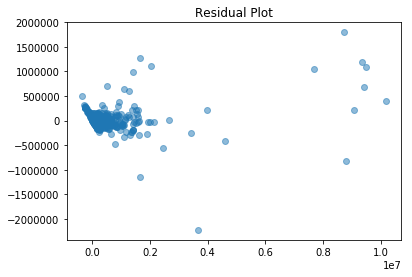

In [133]:
import scipy.stats as stats
data=pd.DataFrame()
pred = lasso_model.predict(X_test_scaled)
resid = y_test_w - pred
plt.scatter(pred, resid, alpha=0.5)
plt.title("Residual Plot")
plt.show()

In [87]:
y_test_w.size

814

In [139]:
# import scipy.stats as stats
# data=pd.DataFrame()
# pred = lasso_model.predict(X_test_scaled)
# resid = y_test_w - pred
# with sns.axes_style('white'):
#     plot=data.plot(kind='scatter',
#                   x='pred',y='resid',alpha=0.2,figsize=(6,4))

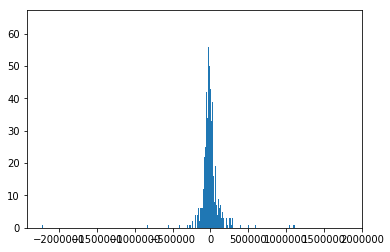

In [90]:
plt.hist(resid, bins=500);

In [2]:
# See the regression fit
plt.scatter(y_test_w,pred)
plt.plot(pred, pred, color='red',linewidth=1);
plt.title("Regression fit")
plt.xlabel("Actual Year End Sales")
plt.ylabel("Predicted Year End Sales")

NameError: name 'plt' is not defined

### Q/Q plot shows heavy tails, curves off at its extremities, clearly not normally distributed errors

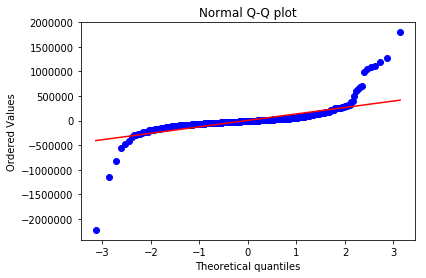

In [134]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

## Run Q2 Data and compare final coefficient

In [94]:
with open('chal2_polk_clean_OLS_Q2.pickle','rb') as read_file:
    polk_clean_Q2 = pickle.load(read_file)

In [110]:
X_Q2, y_Q2 = polk_clean_Q2.drop('EoY_Sales',axis=1), polk_clean_Q2['EoY_Sales']

In [111]:
X_Q2, X_test_Q2, y_Q2, y_test_Q2 = train_test_split(X_Q2, y_Q2, test_size=.2, random_state=10)
X_train_Q2, X_val_Q2, y_train_Q2, y_val_Q2 = train_test_split(X_Q2, y_Q2, test_size=.25, random_state=10)

In [114]:
scaler = StandardScaler()
X_scaled_Q2 = scaler.fit_transform(X_train_Q2)
X_test_scaled_Q2 = scaler.transform(X_test_Q2)

In [115]:
lasso_model_Q2 = Lasso(alpha=95.47716114208056)
X_scaled_all_Q2 = scaler.fit_transform(X_Q2)
lasso_model_Q2.fit(X_scaled_all_Q2,y_Q2)

Lasso(alpha=95.47716114208056, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
final_coef_Q2 = pd.DataFrame(zip(X_train_w.columns, lasso_model_Q2.coef_))
final_coef_Q2.columns = ['Covariate','Coefficient']
final_coef_Q2

,Covariate,Coefficient
0,Pack,-13846.983661
1,Bottle_Volume_(ml),-6780.086824
2,State_Bottle_Cost,-59229.616965
3,State_Bottle_Retail,124240.981806
4,Bottles_Sold,0.000000
5,Qtr_Sales,-63269.521789
6,Volume_Sold_(Gallons),495553.748391
7,Retail_Margin,537464.288754
8,Gross_Margin,-9150.913530
9,BRANDIES,-59770.756508


In [119]:
lasso_model_Q2 = Lasso(alpha=95.47716114208056)
lasso_model_Q2.fit(X_scaled_Q2, y_train_Q2)
test_set_pred_Q2 = lasso_model_Q2.predict(X_test_scaled_Q2)

In [121]:
r2_score(y_test_Q2, test_set_pred_Q2)

0.9704911800374282